### Principal Components Analysis (PCA)

PCA is a preprocessing step, which decomposes a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. It is used when we need to tackle datasets with a large number of features with different scales, some of which might be correlated. These correlations and the high dimension of the dataset bring a redudancy in the information. Applying PCA, the original features are transformed to linear combinations of new independent variables, which reduce the complexity of the dataset and thus, the computational cost.

Summarizing, the main purpose of principal component analysis is to:

  + identify hidden pattern in a data set,
  + reduce the dimensionnality of the data by removing the noise and redundancy in the data,
  + identify correlated variables

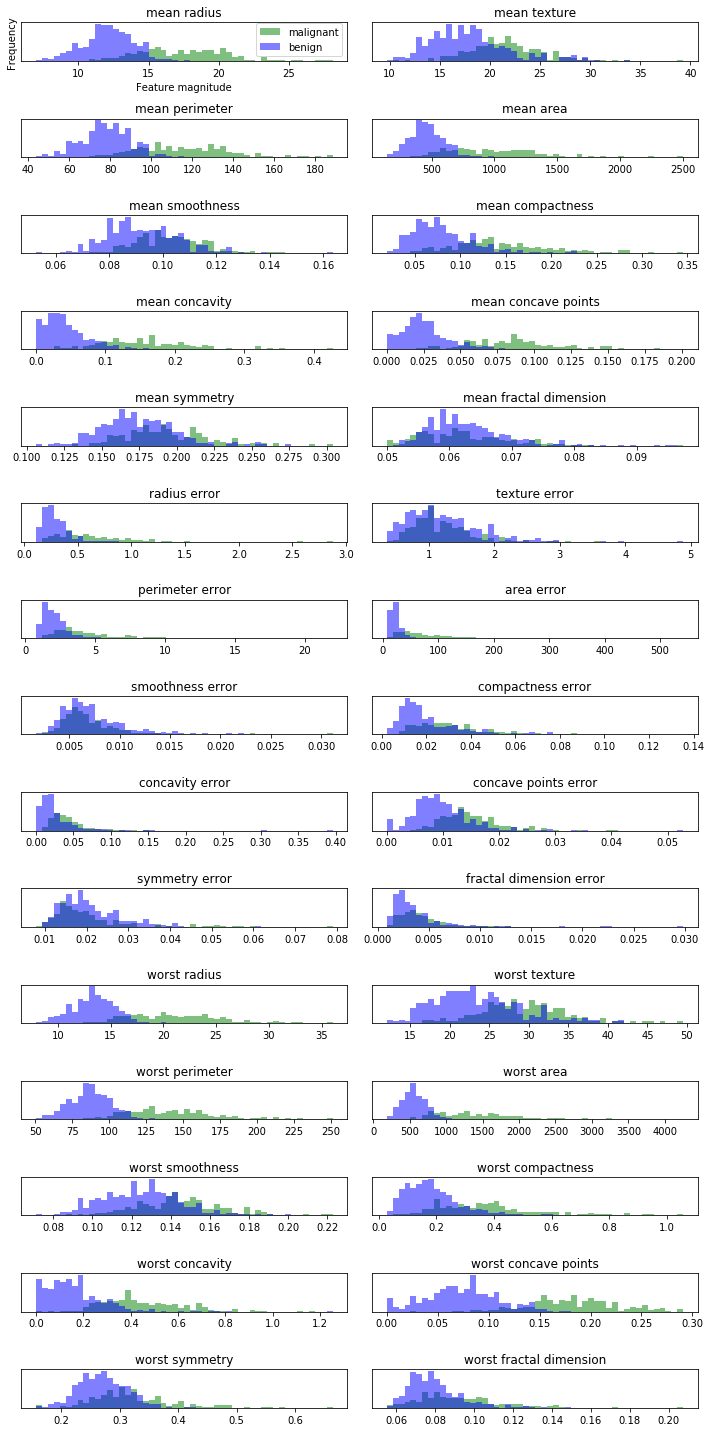

In [43]:
%matplotlib inline
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color="g", alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color="b", alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

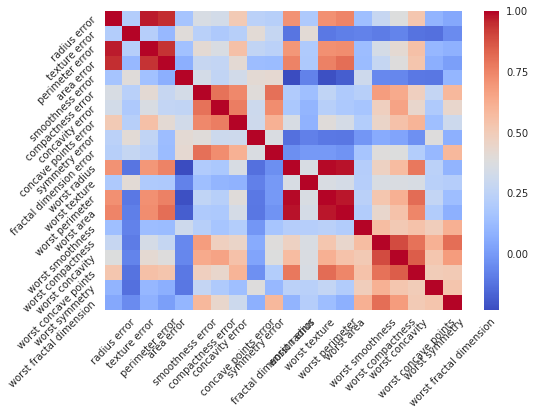

In [95]:
feature_worst=list(cancer_df.columns[10:31]) # select the 'worst' features
import seaborn as sns
s=sns.heatmap(cancer_df[feature_worst].corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=45,fontsize=10)
s.set_xticklabels(s.get_xticklabels(),rotation=46,fontsize=10)
plt.show()

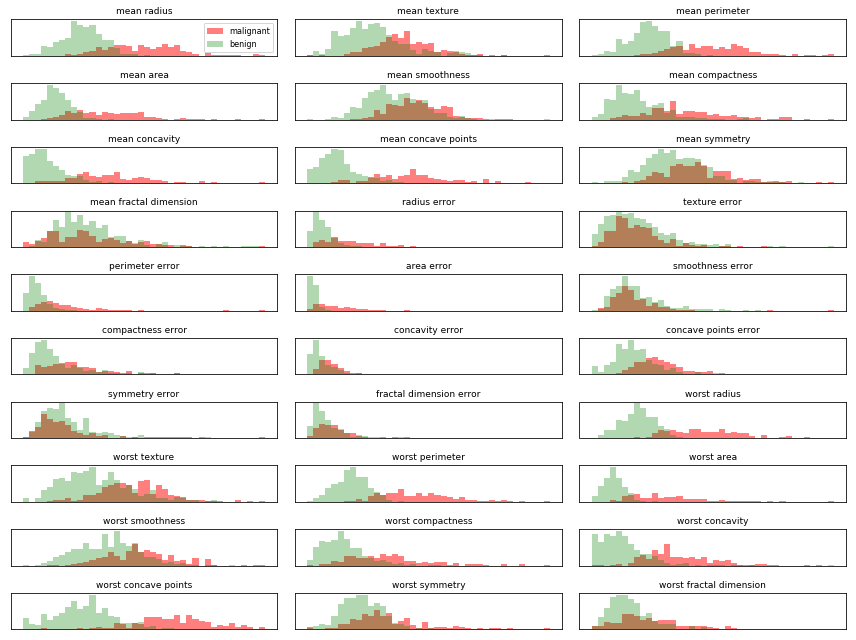

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
# from matplotlib.pyplot import matplotlib
fig,axes =plt.subplots(10,3, figsize=(12, 9)) # 3 columns each containing 10 figures, total 30 features
malignant=cancer.data[cancer.target==0] # define malignant
benign=cancer.data[cancer.target==1] # define benign
ax=axes.ravel()# flat axes with numpy ravel
for i in range(30):
  _,bins=np.histogram(cancer.data[:,i],bins=40)
  ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
  ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region 
  ax[i].set_title(cancer.feature_names[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
  ax[i].set_yticks(())
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

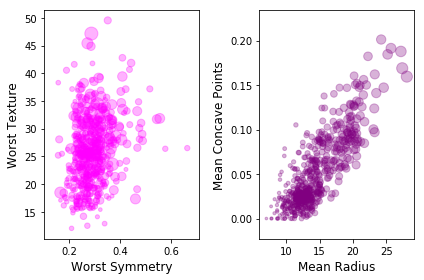

In [46]:
import pandas as pd
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)# just convert the scikit learn data-set to pandas data-frame.
plt.subplot(1,2,1)#fisrt plot
plt.scatter(cancer_df['worst symmetry'], cancer_df['worst texture'], s=cancer_df['worst area']*0.05, color='magenta', label='check', alpha=0.3)
plt.xlabel('Worst Symmetry',fontsize=12)
plt.ylabel('Worst Texture',fontsize=12)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(cancer_df['mean radius'], cancer_df['mean concave points'], s=cancer_df['mean area']*0.05, color='purple', label='check', alpha=0.3)
plt.xlabel('Mean Radius',fontsize=12)
plt.ylabel('Mean Concave Points',fontsize=12)
plt.tight_layout()
plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# keep the first two principal components of the data
pca = PCA(n_components=3)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 3)


/home/ubuntu/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


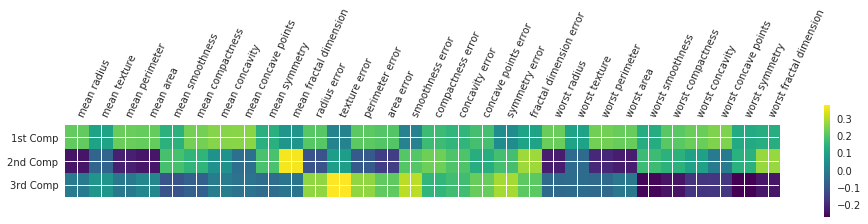

In [88]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 